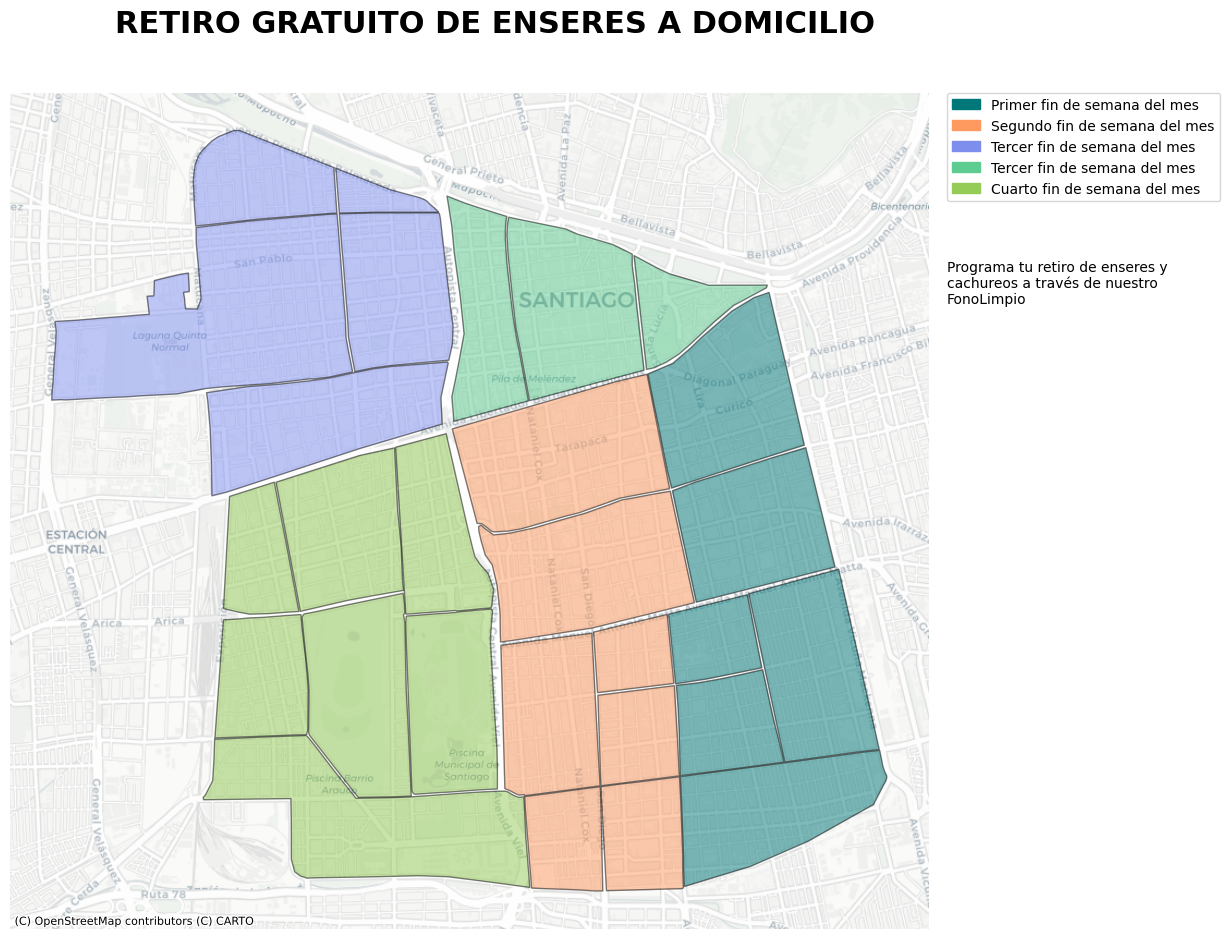

<Figure size 640x480 with 0 Axes>

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as ctx


labels = {
    1: "Primer fin de semana del mes",
    2: "Segundo fin de semana del mes",
    3: "Tercer fin de semana del mes",
    4: "Tercer fin de semana del mes",
    5: "Cuarto fin de semana del mes",
}

pal = {
    1: "#007879",
    2: "#FE9A60",
    3: "#7D8EED",
    4: "#5ECC91",
    5: "#95CC57",
}



ruta = "zonas_retiro_santiago.gpkg"
capa = "zonas_retiro_santiago"
gdf = gpd.read_file(ruta, layer=capa).to_crs(epsg=3857)
gdf["zona_label"] = "Zona " + gdf["zona"].astype(str)

fig, ax = plt.subplots(figsize=(10, 10))

titulo = "RETIRO GRATUITO DE ENSERES A DOMICILIO"
bajada = "Programa tu retiro de enseres y\ncachureos a través de nuestro\nFonoLimpio"
# --- TÍTULO ARRIBA (fuera del mapa) ---
fig.suptitle(titulo, fontsize=22, fontweight="bold", y=0.98)

# deja espacio arriba para el título
fig.subplots_adjust(top=0.4)

gdf.plot(
    ax=ax,
    color=gdf["color"],     # usa tu color
    edgecolor="black",
    linewidth=1,
    alpha=0.5,
    legend=True
)

handles = [
    mpatches.Patch(color=pal[k], label=labels[k])
    for k in sorted(pal.keys())
]

ax.legend(
    handles=handles,
    loc="upper left",
    bbox_to_anchor=(1.02, 1),  # la manda al costado derecho
    borderaxespad=0,
    frameon=True,
    title=None
)


ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.text(
    1.02, 0.8, bajada,
    transform=ax.transAxes,
    ha="left", va="top",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.85, edgecolor="none")
)
ax.set_axis_off()
plt.tight_layout()
plt.show()

plt.savefig(
    "retiro_enseres_santiago.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)



In [65]:
import geopandas as gpd
import folium

# 1) leer tu gpkg
ruta = "zonas_retiro_santiago.gpkg"
capa = "zonas_retiro_santiago"
gdf = gpd.read_file(ruta, layer=capa)

# 2) asegurar CRS para web (Leaflet usa EPSG:4326)
if gdf.crs is None:
    # si tu capa viene de QGIS en 3857 normalmente, ajusta aquí si corresponde:
    # gdf = gdf.set_crs(3857)
    raise ValueError("Tu capa no tiene CRS definido (gdf.crs es None). Defínelo antes de convertir.")
gdf_web = gdf.to_crs(4326)

# 3) centro del mapa
centro = gdf_web.geometry.union_all().centroid
m = folium.Map(location=[centro.y, centro.x], zoom_start=12, tiles="OpenStreetMap")

# 4) capa GeoJSON con estilo por color
def style_fn(feat):
    col = feat["properties"].get("color", "#3388ff")
    return {
        "fillColor": col,
        "color": "#333333",
        "weight": 2,
        "fillOpacity": 0.45,
    }

tooltip = folium.GeoJsonTooltip(
    fields=["zona", "fin_sem"],
    aliases=["Zona:", "Fin de semana:"],
    sticky=False
)

folium.GeoJson(
    gdf_web,
    style_function=style_fn,
    tooltip=tooltip,
    name="Zonas retiro"
).add_to(m)

folium.LayerControl().add_to(m)

# 5) guardar HTML
m.save("retiro_enseres_santiago.html")
print("Listo: retiro_enseres_santiago.html")



Listo: retiro_enseres_santiago.html
